In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from help_functions.evaluate_energymodels import evaluate_different_energymodels
from energy_consumption.feature_selection.clean.impute_outliers import impute_outliers


from energy_consumption.models.lasso.lasso import get_Lasso_forecasts
from energy_consumption.models.baseline import get_baseline_forecasts
from energy_consumption.models.knn.knn import get_KNNRegression_forecasts
from energy_consumption.models.XGBoost.XGBoost import get_XGBoost_forecasts
from energy_consumption.models.quantreg.quantreg_ex import get_QuantRegExShort_forecasts
from energy_consumption.models.quantreg.quantreg_end import get_QuantRegEndShort_forecasts

In [2]:
energydata = pd.read_csv(
        'c:\\Users\\Maria\\Documents\\Studium\\Pyhton Projekte\\PTSFC\\energy_consumption\\feature_selection\\data\\historical_data.csv')
energydata['date_time'] = pd.to_datetime(
energydata['date_time'], format='%Y-%m-%d %H:%M:%S')
energydata = energydata.set_index("date_time")
energydata = impute_outliers(energydata)

In [6]:
from energy_consumption.feature_selection.extract.extract_energy_data import get_data
energydata = get_data()

100%|██████████| 364/364 [03:49<00:00,  1.58it/s]


In [16]:
import numpy as np
import pandas as pd

from energy_consumption.feature_selection.extract import extract_energy_data

# import required models
from energy_consumption.models.lasso.lasso import get_Lasso_forecasts
from energy_consumption.models.baseline import get_baseline_forecasts
from energy_consumption.models.knn.knn import get_KNNRegression_forecasts
from energy_consumption.models.XGBoost.XGBoost import get_XGBoost_forecasts
from energy_consumption.models.quantreg.quantreg_ex import get_QuantRegExShort_forecasts
from energy_consumption.models.quantreg.quantreg_end import get_QuantRegEndShort_forecasts


def combine_selected_models(energydata=pd.DataFrame):

    if type(energydata) == float:
        # use derived optimum for number of years
        energydata = extract_energy_data.get_data()

    QuantRegExShort_forecasts = get_QuantRegExShort_forecasts(energydata)
    QuantRegEndShort_forecasts = get_QuantRegEndShort_forecasts(energydata)
    Lasso_forecasts = get_Lasso_forecasts(energydata)
    XGBoost_forecasts = get_XGBoost_forecasts(energydata)
    KNN_forecasts = get_KNNRegression_forecasts(energydata)

    combined_model = QuantRegExShort_forecasts.copy()

    combined_model.loc[:, 'q0.025':'q0.975'].iloc[0] = np.array(
        XGBoost_forecasts.loc[:, 'q0.025':'q0.975'].iloc[0])*0.8 + np.array(QuantRegEndShort_forecasts.loc[:, 'q0.025':'q0.975'].iloc[0])*0.2
    combined_model.loc[:, 'q0.025':'q0.975'].iloc[1] = np.array(
        XGBoost_forecasts.loc[:, 'q0.025':'q0.975'].iloc[1])*0.8 + np.array(QuantRegEndShort_forecasts.loc[:, 'q0.025':'q0.975'].iloc[1])*0.1 + np.array(Lasso_forecasts.loc[:, 'q0.025':'q0.975'].iloc[1])*0.1
    combined_model.loc[:, 'q0.025':'q0.975'].iloc[2] = np.array(
        XGBoost_forecasts.loc[:, 'q0.025':'q0.975'].iloc[2])*0.7 + np.array(QuantRegEndShort_forecasts.loc[:, 'q0.025':'q0.975'].iloc[2])*0.1 + np.array(KNN_forecasts.loc[:, 'q0.025':'q0.975'].iloc[2])*0.2
    combined_model.loc[:, 'q0.025':'q0.975'].iloc[3] = np.array(
        XGBoost_forecasts.loc[:, 'q0.025':'q0.975'].iloc[3])*0.6 + np.array(Lasso_forecasts.loc[:, 'q0.025':'q0.975'].iloc[3])*0.2 + np.array(KNN_forecasts.loc[:, 'q0.025':'q0.975'].iloc[3])*0.2
    combined_model.loc[:, 'q0.025':'q0.975'].iloc[4] = np.array(
        XGBoost_forecasts.loc[:, 'q0.025':'q0.975'].iloc[4])*0.5 + np.array(KNN_forecasts.loc[:, 'q0.025':'q0.975'].iloc[4])*0.5
    combined_model.loc[:, 'q0.025':'q0.975'].iloc[5] = np.array(
        XGBoost_forecasts.loc[:, 'q0.025':'q0.975'].iloc[5])*0.3 + np.array(QuantRegEndShort_forecasts.loc[:, 'q0.025':'q0.975'].iloc[5])*0.2 + np.array(QuantRegExShort_forecasts.loc[:, 'q0.025':'q0.975'].iloc[5])*0.5

    combined_model['date_time'] = QuantRegExShort_forecasts['date_time']
    combined_model['forecast_date'] = QuantRegExShort_forecasts['forecast_date']
    combined_model['target'] = QuantRegExShort_forecasts['target']
    combined_model['horizon'] = QuantRegExShort_forecasts['horizon']

    return combined_model

In [23]:

import numpy as np
import pandas as pd

from energy_consumption.feature_selection.extract import extract_energy_data

# import required models
from energy_consumption.models.lasso.lasso import get_Lasso_forecasts
from energy_consumption.models.baseline import get_baseline_forecasts
from energy_consumption.models.knn.knn import get_KNNRegression_forecasts
from energy_consumption.models.XGBoost.XGBoost import get_XGBoost_forecasts
from energy_consumption.models.quantreg.quantreg_ex import get_QuantRegExShort_forecasts
from energy_consumption.models.quantreg.quantreg_end import get_QuantRegEndShort_forecasts


def combine_selected_models(energydata=pd.DataFrame):

    if type(energydata) == float:
        # use derived optimum for number of years
        energydata = extract_energy_data.get_data()

    QuantRegExShort_forecasts = get_QuantRegExShort_forecasts(energydata)
    QuantRegEndShort_forecasts = get_QuantRegEndShort_forecasts(energydata)
    Lasso_forecasts = get_Lasso_forecasts(energydata)  # corrected
    XGBoost_forecasts = get_XGBoost_forecasts(energydata)
    KNN_forecasts = get_KNNRegression_forecasts(energydata)

    combined_model = pd.DataFrame(  # corrected
        index=Lasso_forecasts.index, columns=Lasso_forecasts.columns)
    combined_model.loc[:, 'q0.025':'q0.975'] = np.nan

    combined_model.loc[:, 'q0.025':'q0.975'].iloc[0] = np.array(
        XGBoost_forecasts.loc[:, 'q0.025':'q0.975'].iloc[0])*0.8 + np.array(QuantRegEndShort_forecasts.loc[:, 'q0.025':'q0.975'].iloc[0])*0.2
    combined_model.loc[:, 'q0.025':'q0.975'].iloc[1] = np.array(
        XGBoost_forecasts.loc[:, 'q0.025':'q0.975'].iloc[1])*0.8 + np.array(QuantRegEndShort_forecasts.loc[:, 'q0.025':'q0.975'].iloc[1])*0.1 + np.array(Lasso_forecasts.loc[:, 'q0.025':'q0.975'].iloc[1])*0.1
    combined_model.loc[:, 'q0.025':'q0.975'].iloc[2] = np.array(
        XGBoost_forecasts.loc[:, 'q0.025':'q0.975'].iloc[2])*0.7 + np.array(QuantRegEndShort_forecasts.loc[:, 'q0.025':'q0.975'].iloc[2])*0.1 + np.array(KNN_forecasts.loc[:, 'q0.025':'q0.975'].iloc[2])*0.2
    combined_model.loc[:, 'q0.025':'q0.975'].iloc[3] = np.array(
        XGBoost_forecasts.loc[:, 'q0.025':'q0.975'].iloc[3])*0.6 + np.array(Lasso_forecasts.loc[:, 'q0.025':'q0.975'].iloc[3])*0.2 + np.array(KNN_forecasts.loc[:, 'q0.025':'q0.975'].iloc[3])*0.2
    combined_model.loc[:, 'q0.025':'q0.975'].iloc[4] = np.array(
        XGBoost_forecasts.loc[:, 'q0.025':'q0.975'].iloc[4])*0.5 + np.array(KNN_forecasts.loc[:, 'q0.025':'q0.975'].iloc[4])*0.5
    combined_model.loc[:, 'q0.025':'q0.975'].iloc[5] = np.array(
        XGBoost_forecasts.loc[:, 'q0.025':'q0.975'].iloc[5])*0.3 + np.array(QuantRegEndShort_forecasts.loc[:, 'q0.025':'q0.975'].iloc[5])*0.2 + np.array(QuantRegExShort_forecasts.loc[:, 'q0.025':'q0.975'].iloc[5])*0.5

    combined_model['date_time'] = QuantRegExShort_forecasts['date_time']
    combined_model['forecast_date'] = QuantRegExShort_forecasts['forecast_date']
    combined_model['target'] = QuantRegExShort_forecasts['target']
    combined_model['horizon'] = QuantRegExShort_forecasts['horizon']

    return combined_model

In [26]:
# Functions work

baseline = {
    'name': 'Baseline Model',
    'function': get_baseline_forecasts
}

lasso = {
    'name': 'Lasso Regression',
    'function': get_Lasso_forecasts
}

quantregshortex = {
    'name': "Quantile Regression Ex",
    'function': get_QuantRegExShort_forecasts
}

quantregshortend = {
    'name': "Quantile Regression End",
    'function': get_QuantRegEndShort_forecasts
}

knn = {
    'name': 'KNN Regression',
    'function': get_KNNRegression_forecasts
}

xgboost = {
    'name': 'XGBoost Regression', 
    'function': get_XGBoost_forecasts
}

combi = {
    'name': 'combination', 
    'function': combine_selected_models
}

models = [combi]
evaluation = evaluate_different_energymodels(
    models, energydata, last_x=12, years=False, months=False, weeks=True)

*********** Start the evaluation of model combination***********
2017-02-06 00:00:00
2024-01-18 12:00:00
2024-01-17 13:00:00
2024-01-22 16:00:00
2017-02-06 00:00:00
2024-01-18 12:00:00
2024-01-17 13:00:00
2024-01-22 16:00:00
did you update weather and index?
2017-11-18 10:00:00
2024-01-18 12:00:00
did you update weather and index?
2024-01-17 13:00:00
2024-01-22 16:00:00
                     constant  abs_log_ret_weekly  sun_hours      tavg  \
date_time                                                                
2024-01-17 13:00:00         1        3.330669e-16  -1.655125  0.020779   
2024-01-17 14:00:00         1        3.330669e-16  -1.655125  0.020779   
2024-01-17 15:00:00         1        3.330669e-16  -1.655125  0.020779   
2024-01-17 16:00:00         1        3.330669e-16  -1.655125  0.020779   
2024-01-17 17:00:00         1        3.330669e-16  -1.655125  0.020779   
...                       ...                 ...        ...       ...   
2024-01-21 12:00:00         1      

c:\Users\Maria\Documents\Setups\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


2017-02-06 00:00:00
2024-01-04 12:00:00
2024-01-03 13:00:00
2024-01-08 16:00:00
did you update weather and index?
2017-11-04 10:00:00
2024-01-04 12:00:00
did you update weather and index?
2024-01-03 13:00:00
2024-01-08 16:00:00
                     constant  abs_log_ret_weekly  sun_hours      tavg  \
date_time                                                                
2024-01-03 13:00:00         1                 0.0  -1.611683  1.381938   
2024-01-03 14:00:00         1                 0.0  -1.611683  1.381938   
2024-01-03 15:00:00         1                 0.0  -1.611683  1.381938   
2024-01-03 16:00:00         1                 0.0  -1.611683  1.381938   
2024-01-03 17:00:00         1                 0.0  -1.611683  1.381938   
...                       ...                 ...        ...       ...   
2024-01-07 12:00:00         1                 0.0   1.544060 -1.938800   
2024-01-07 13:00:00         1                 0.0   1.544060 -1.938800   
2024-01-07 14:00:00         1   

c:\Users\Maria\Documents\Setups\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


did you update weather and index?
2017-09-23 10:00:00
2023-11-23 12:00:00
did you update weather and index?
2023-11-22 13:00:00
2023-11-27 16:00:00
                     constant  abs_log_ret_weekly  sun_hours      tavg  \
date_time                                                                
2023-11-22 13:00:00         1                 0.0   1.710825 -1.590934   
2023-11-22 14:00:00         1                 0.0   1.710825 -1.590934   
2023-11-22 15:00:00         1                 0.0   1.710825 -1.590934   
2023-11-22 16:00:00         1                 0.0   1.710825 -1.590934   
2023-11-22 17:00:00         1                 0.0   1.710825 -1.590934   
...                       ...                 ...        ...       ...   
2023-11-26 12:00:00         1                 0.0  -1.471108 -0.651776   
2023-11-26 13:00:00         1                 0.0  -1.471108 -0.651776   
2023-11-26 14:00:00         1                 0.0  -1.471108 -0.651776   
2023-11-26 15:00:00         1         

### Visualize Comparison 

1. Create a table that only contains the different scores of the different models

In [27]:
models[0]['evaluation']

,forecast_date,target,horizon,q0.025,q0.25,q0.5,q0.75,q0.975,energy_consumption,score
date_time,,,,,,,,,,
2024-01-19 12:00:00,2024-01-27,energy,36 hour,65.559572,70.929511,72.386535,74.143426,78.320673,73.72975,3.588227
2024-01-19 16:00:00,2024-01-27,energy,40 hour,64.319877,66.726631,69.117817,70.100341,74.455205,69.58725,2.663055
2024-01-19 20:00:00,2024-01-27,energy,44 hour,59.722946,64.072026,65.668825,67.483072,73.412741,66.40475,3.125938
2024-01-20 12:00:00,2024-01-27,energy,60 hour,55.503126,60.509851,61.830503,64.616827,67.133787,62.79450,3.599019
2024-01-20 16:00:00,2024-01-27,energy,64 hour,51.833886,56.955173,58.784481,60.672633,65.432945,57.89975,3.423415
2024-01-20 20:00:00,2024-01-27,energy,68 hour,54.854259,60.611345,62.426752,64.390695,70.731461,57.41425,14.090227
2024-01-12 12:00:00,2024-01-27,energy,36 hour,66.778442,69.332299,70.199522,70.662711,71.86683,71.25650,3.164181
2024-01-12 16:00:00,2024-01-27,energy,40 hour,65.7578,67.522864,68.884277,69.409932,70.952963,67.73650,2.351069
2024-01-12 20:00:00,2024-01-27,energy,44 hour,59.859619,62.617618,64.226785,65.234192,69.714494,63.05800,2.969815


In [28]:
horizons = ['36 hour', '40 hour', '44 hour', '60 hour', '64 hour', '68 hour']
scores = []
names = []
for h in horizons:
    for m in models:
        col_name = f'{m["name"]}: {h}'
        scores.append(m['evaluation']['score']
                      [m['evaluation']['horizon'] == h])
        names.append(col_name)

score_df = pd.concat(scores, axis=1, keys=names)

In [ ]:
models[3]['evaluation'][models[3]['evaluation']['horizon'] == '40 hour']

In [29]:
score_summary = pd.DataFrame()
horizons = ['36 hour', '40 hour', '44 hour', '60 hour', '64 hour', '68 hour']


mean_score ={} # model, horizon, mean_score
for h in horizons: 
    mean_scores = []
    for m in models: 
        m_score = np.mean(m['evaluation']['score'][m['evaluation']['horizon'] == h])
        mean_scores.append(m_score)
    score_summary[h] = mean_scores

score_summary

,36 hour,40 hour,44 hour,60 hour,64 hour,68 hour
0,4.158204,3.53736,3.095466,4.494037,4.378625,5.361881


In [17]:
250*7/365

4.794520547945205

In [30]:
score_summary = pd.DataFrame()
horizons = ['36 hour', '40 hour', '44 hour', '60 hour', '64 hour', '68 hour']

var_score = {}  # model, horizon, mean_score
for h in horizons:
    var_scores = []
    for m in models:
        m_score = np.var(m['evaluation']['score']
                          [m['evaluation']['horizon'] == h])
        var_scores.append(m_score)
    score_summary[h] = var_scores

score_summary

,36 hour,40 hour,44 hour,60 hour,64 hour,68 hour
0,6.114091,2.09921,1.332637,9.359228,4.197818,12.314176


In [8]:
horizons = ['36 hour', '40 hour', '44 hour', '60 hour', '64 hour', '68 hour']
mean_scores = []
var_scores = []
for h in horizons:
    for m in models:
        col_name = f'{m["name"]}: {h}'
        scores.append(m['evaluation']['score']
                      [m['evaluation']['horizon'] == h])
        names.append(col_name)

In [9]:
250*7/365

4.794520547945205

2.  Plot the densities of the obtained scores

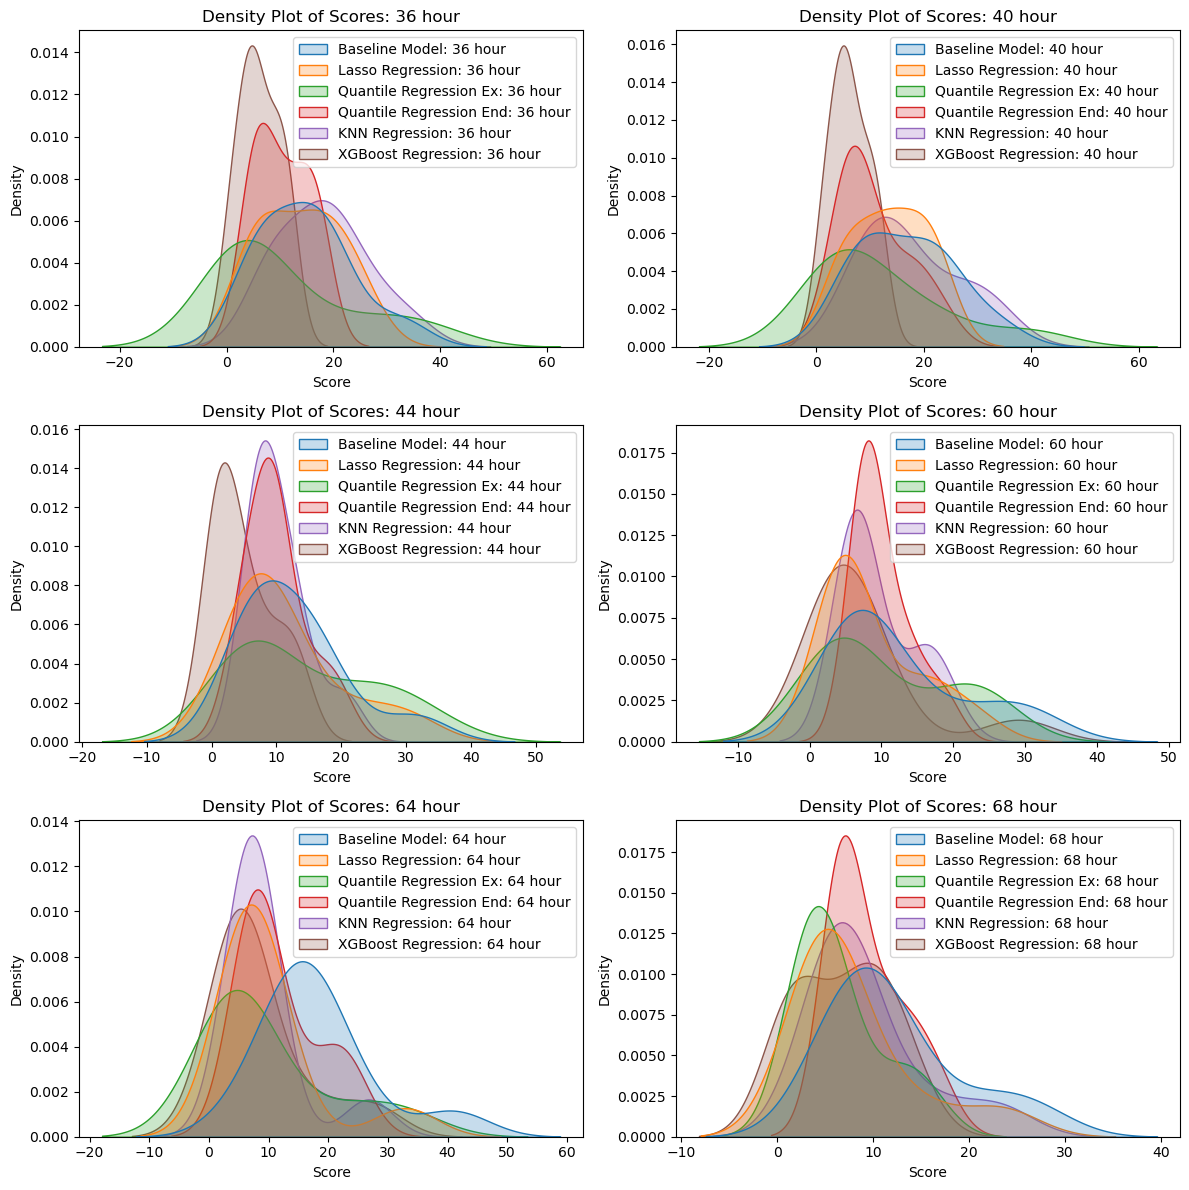

In [9]:
# Create subplots
fig, axes = plt.subplots(3,2, figsize=(12,12))

# Flatten the 2D array of subplots to simplify indexing
axes = axes.flatten()

# Loop through each horizon
for i, h in enumerate(horizons):
    # Select columns related to the current horizon
    relevant_cols = [f'{m["name"]}: {h}' for m in models]

    # Filter the relevant data for the current horizon
    data_subset = score_df.loc[:, relevant_cols]

    # Create a KDE plot for the current horizon
    sns.kdeplot(data=data_subset, fill=True, ax=axes[i])

    # Set labels and title for each subplot
    axes[i].set_xlabel('Score')
    axes[i].set_ylabel('Density')
    axes[i].set_title(f'Density Plot of Scores: {h}')

# Adjust layout to prevent overlap of subplots
plt.tight_layout()

# Display the plots
plt.show()

Best Models (for combination): 


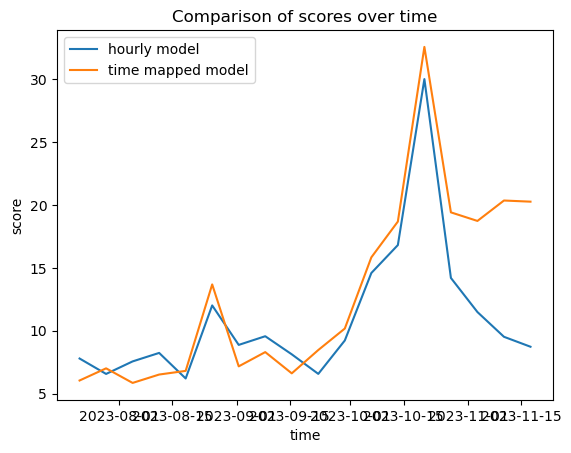

In [14]:
# Plot values from two columns over time
score_df_36_no_na = score_df[score_df['seasonal model hourly: 36 hour'].notna(
)]
# plt.plot(score_df_36_no_na.index, score_df_36_no_na['baseline: 36 hour'], label='baseline')
plt.plot(score_df_36_no_na.index,
         score_df_36_no_na['seasonal model hourly: 36 hour'], label='hourly model')

plt.plot(score_df_36_no_na.index,
         score_df_36_no_na['seasonal model with time mapping: 36 hour'], label='time mapped model')

# Adding labels and title
plt.xlabel('time')
plt.ylabel('score')
plt.title('Comparison of scores over time')

# Display legend
plt.legend()

# Show the plot
plt.show()